In [5]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt

#plots matplotlib graphs below code cells
%matplotlib inline 

### Fetching Assets Data From Yahoo Finances

In [10]:
# PG and S&P 500
assets = ["PG", "^GSPC"]
portfolio_df = pd.DataFrame()

for asset in assets:
    portfolio_df[asset] = web.DataReader(asset, data_source = "yahoo", start = "2010-1-1")["Adj Close"]

### Normalizing to 100 and Plotting Data

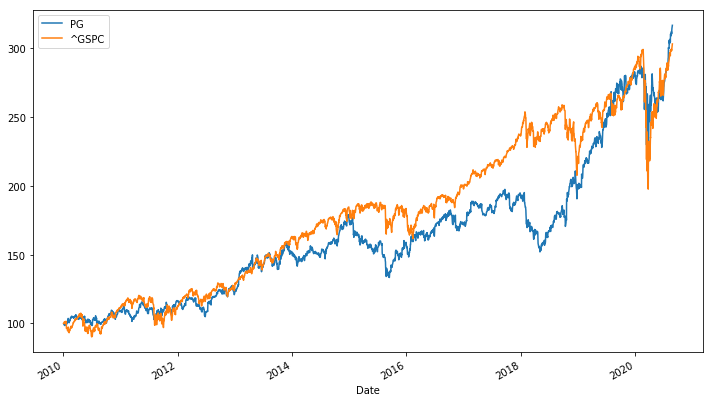

In [11]:
(portfolio_df / portfolio_df.iloc[0] * 100).plot(figsize = (12, 7))

### Obtaining The Efficient Frontier Composed of The Assets

* Calculating the Log Returns

In [15]:
log_returns = np.log(portfolio_df / portfolio_df.shift(1))

* Average (Yearly)

In [16]:
log_returns.mean() * 250

PG       0.107516
^GSPC    0.103442
dtype: float64

They had a solid rate of return during the timeframe considered

* Covariance (Yearly)

In [19]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.029413,0.017878
^GSPC,0.017878,0.030506


* Correlation Matrices

In [20]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.596853
^GSPC,0.596853,1.000000


**PS.** The returns are well correlated (> 0.30)

## Portfolio Optimization

### Getting the actual number of assets in the portfolios

It will respond in case of changing the number of assets

In [21]:
number_of_assets = len(assets)

### Creating Random Weights (which sums 1)

In [26]:
weights = np.random.random(number_of_assets)
weights /= np.sum(weights)
weights

array([0.60053803, 0.39946197])

<hr/>

## Part II

### Breaking in pieces to understand the for loop some cells below

### Expected Portfolio Returns:

In [38]:
portfolio_returns = np.sum(weights * log_returns.mean()) * 250

### Expected Portfolio Variance

In [36]:
portfolio_variance = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

### Expected Portfolio Volatility

In [39]:
portfolio_volatility = np.sqrt(portfolio_variance)

### Considering 1000 COMBINATIONS of the same two assets

It will cover, for instance:

- PG from 1% to 99% of portfolio weight
- ^GSPC from 99% to 1% of portfolio weight

### Calculating the hypothetical portfolio's returns and volatilities

In [45]:
portfolio_returns = []
portfolio_volatilities = []

log_returns = np.log(portfolio_df / portfolio_df.shift(1))

# calculating expected future portfolio returns
for hypothesis in range(1000):
    # generates random portfolio weights
    weights = np.random.random(number_of_assets)
    # adjusts the weights to have 1 (100%) as result of their sum
    weights /= np.sum(weights)
    # add each newly generate portfolio's return value to the list portfolio_returns
    portfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    # add each newly generate portfolio's volatility value to the list portofolio_volatilities
    portfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

### Converting the List in Numpy Arrays to Make Easy The Data Manipulation 

In [46]:
pfolio_returns = np.array(portfolio_returns)
pfolio_volatilities = np.array(portfolio_volatilities)

<hr/>

## Part III

#### Creating a Dataframe Containing the Two Numpy Arrays Data 

In [51]:
portfolios = pd.DataFrame({ "Return": pfolio_returns, "Volatility": pfolio_volatilities })

Text(0, 0.5, 'Expected Return')

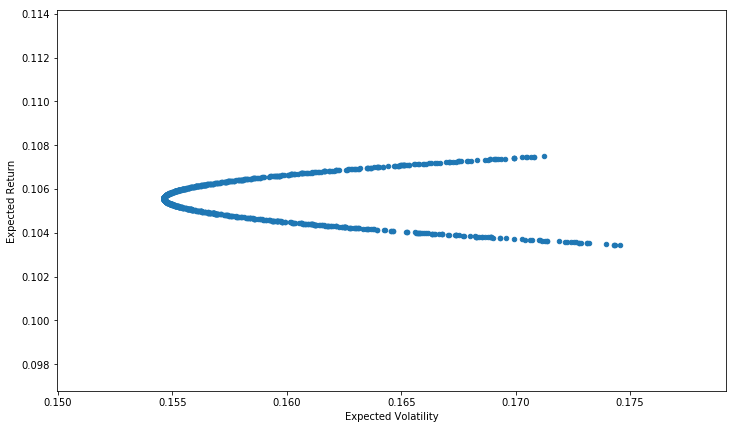

In [55]:
portfolios.plot(x = "Volatility", y = "Return", kind = "scatter", figsize=(12,7))
plt.xlabel("Expected Volatility")
plt.ylabel("Expected Return")